# Tratando a base de dados Credit Card Fraud Detection

(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download&select=creditcard.csv).

Etapas de pré-processamento:
  1) Visualização da base de dados
  2) Verificação e tratamento dos valores ausentes
  3) Detecção e eliminação de redundância e inconsistência
  4) Detecção e tratamento de outliers
  5) Normalização e/ou padronização
  6) Análise de correlação e multicolinearidade
  7) Codificação de variáveis (One-Hot Encoding ou Label Encoding)
  8) Balanceamento da classe
  9) Divisão treino–teste (estratificada)

In [42]:
#importe das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### ETAPA 1 — Visualização da Base

In [2]:
dataset = pd.read_csv('./dataset/creditcard.csv', sep=',')

In [3]:
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Observando media e desvio padrão de todas as colunas
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


#### PLOTE DA CLASSE

Class
0    284315
1       492
Name: count, dtype: int64


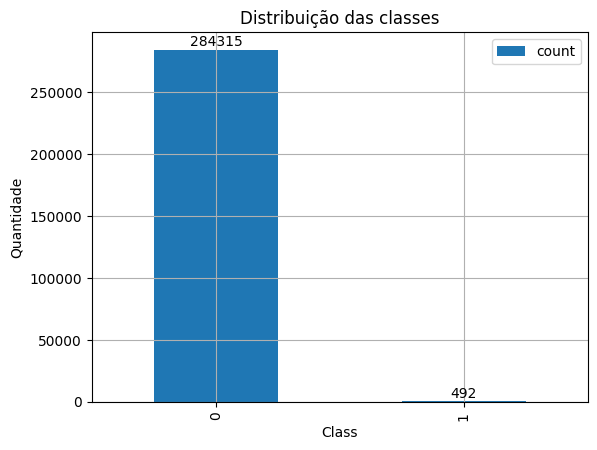

In [6]:
def exibir_distribuicao_classes(dataset : pd.DataFrame):
    plotSet = dataset['Class'].value_counts()
    print(plotSet)
    ax = plotSet.plot(kind="bar", title="Distribuição das classes", grid=True, legend=True, ylabel="Quantidade", xlabel="Class")

    for i, v in enumerate(plotSet):
        ax.text(
            i,                 
            v + max(plotSet)*0.01,   
            str(v),            
            ha='center', 
        )

    plt.show()

exibir_distribuicao_classes(dataset= dataset)

#### Conclusões

- A base de dados se encontra extremamente desbalanceada, tendo em sua maioria casos de *NÃO* fraude, ou seja a menor parte são casos de fraude, sendo necessário um balanceamento

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

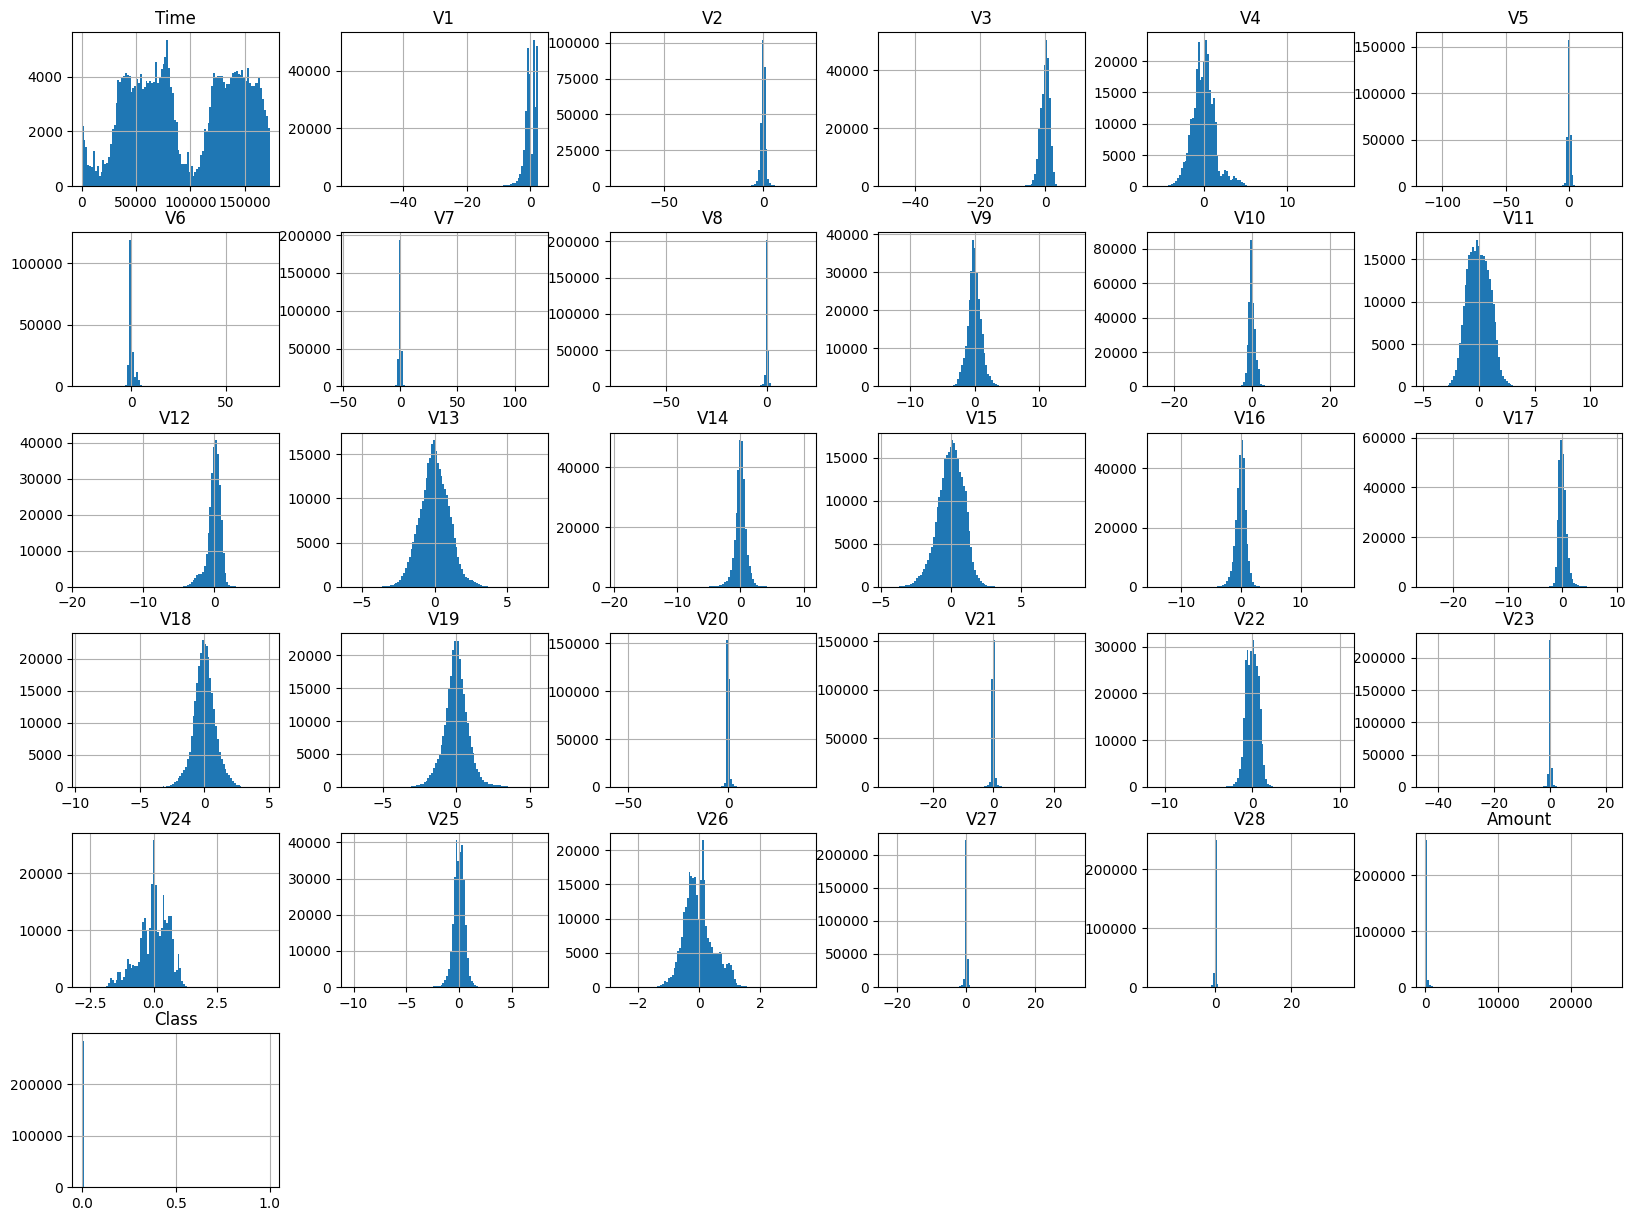

In [7]:
# Verificando a distribuição dos dados
dataset.hist(bins=100, figsize=(20,15))

Observações: as colunas Time e Amount estão em escalas muito diferentes de V1-V28

## ETAPA 2 — Valores Ausentes

In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Tratamento de Valores Ausentes

- Observou-se que nenhuma coluna apresentou valores ausentes, portanto, nenhuma tratativa foi realizada
- Caso ouvem-se valores nulos possíveis tratativas seria imputação por Média/Mediana (para dados numéricos) ou Moda (para categóricos).

### ETAPA 3 — Redundância e Inconsistência

In [9]:
# Duplicidade de linhas
dataset.duplicated().sum()

1081

In [10]:
newDataset = dataset
newDataset.drop_duplicates(inplace=True)


In [11]:
newDataset.duplicated().sum()

0

In [12]:
newDataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


### ETAPA 4 — Outliers

<Axes: >

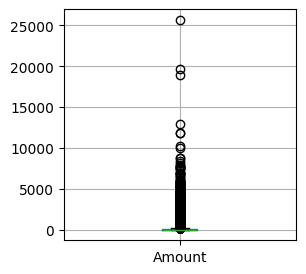

In [13]:
newDataset.boxplot(column=["Amount"], figsize=(3,3))

<Axes: >

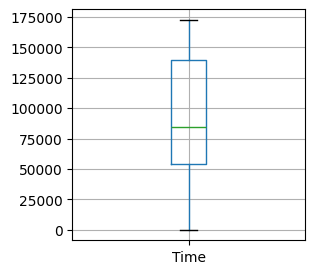

In [14]:
newDataset.boxplot(column=["Time"], figsize=(3,3))

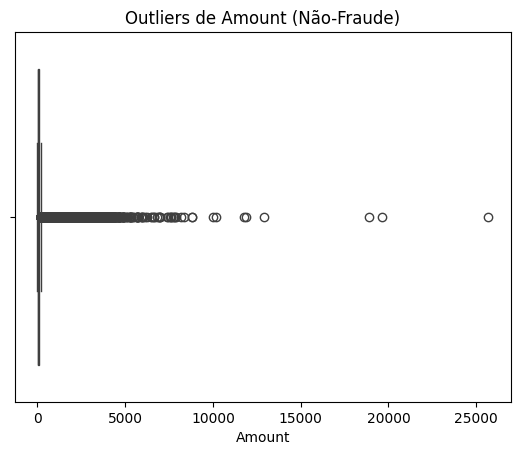

In [15]:
# Por padrão Frudes já são outliers por isso especificarei o tratamento dos outliers as classificados como não-fraude
sns.boxplot(x=newDataset[newDataset['Class'] == 0]['Amount'])
plt.title('Outliers de Amount (Não-Fraude)')
plt.show()

O que foi feito?

- Método do IQR para Limitação (Capping/Fencing)
- Teoria: Em vez de remover o ponto, você o substitui pelo valor máximo ou mínimo aceitável (chamado de capping ou winsorização).
- Cálculo: O limite superior é definido por $Q3 + 1.5 \cdot \text{IQR}$, e o limite inferior por $Q1 - 1.5 \cdot \text{IQR}$

In [16]:
Q1 = newDataset['Amount'].quantile(0.25)
Q3 = newDataset['Amount'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

# Aplicando o Capping na coluna 'Amount'
newDataset.loc[newDataset['Amount'] > limite_superior, 'Amount'] = limite_superior

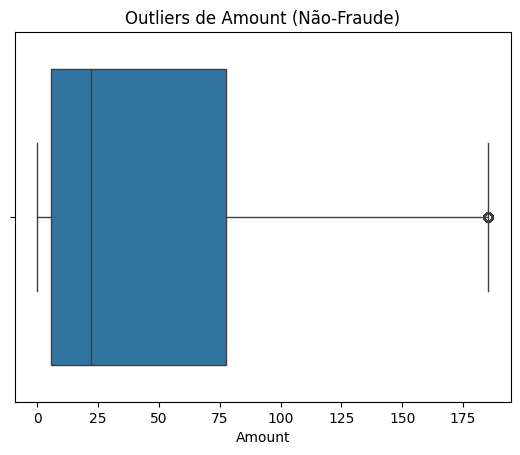

In [17]:
# Nova Visualização após o tratamento
sns.boxplot(x=newDataset[newDataset['Class'] == 0]['Amount'])
plt.title('Outliers de Amount (Não-Fraude)')
plt.show()

In [18]:
""" 
    Script para visualizar todos os outliers
"""
# import matplotlib.pyplot as plt

# num_cols = newDataset.columns
# n = len(num_cols)

# plt.figure(figsize=(20, n * 2))

# for i, col in enumerate(num_cols, 1):
#     plt.subplot(n, 1, i)
#     sns.boxplot(x=newDataset[col])
#     plt.title(f"Boxplot - {col}")

# plt.tight_layout()
# plt.show()

' \n    Script para visualizar todos os outliers\n'

### ETAPA 5 — Normalização / Padronização

Objetivo: Colocar todas as features na mesma escala, garantindo que nenhuma variável domine o cálculo de distâncias.

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
newDataset["Amount_scaled"] = scaler.fit_transform(newDataset[["Amount"]])
newDataset["Time_scaled"] = scaler.fit_transform(newDataset[["Time"]])

# Drop da coluna "Time" -> a coluna Time foi descartada por não ter grande valor preditivo para fraude,
# focando-se apenas no Amount e nas colunas PCA
newDataset = newDataset.drop(columns=["Time", "Amount"])

### ETAPA 6 — Correlação e Multicolinearidade

<Axes: >

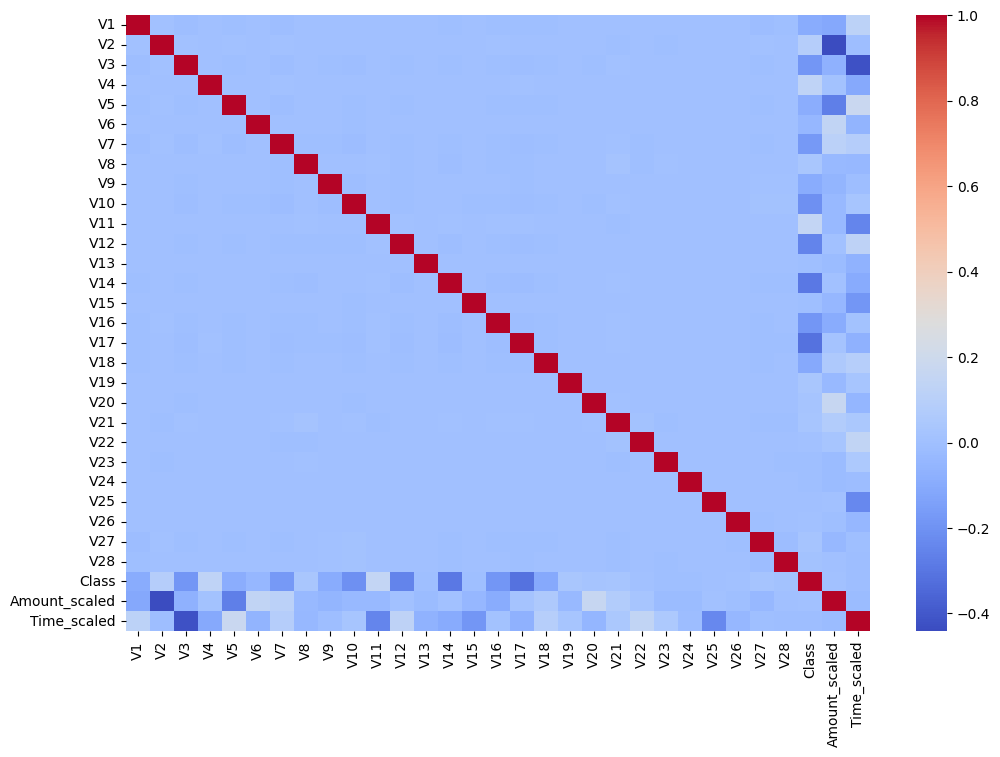

In [20]:
# plotagem de um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(newDataset.corr(), cmap="coolwarm")

*Observações*:

- A diagonal vermelha (correlação = 1.0), logo Cada variável é 100% correlacionada consigo mesma.
- Os atributos V1–V28 têm correlação muito baixa entre si
- Amount_scaled e Time_scaled apresentam pequena correlação com alguns V’s

*Conclusão*: A classe (fraude) tem correlação fraca com todas as variáveis, ou seja, nenhum atributo isolado consegue diferenciar bem fraudes de não fraudes

*Resumo*: A matriz de correlação indica que os atributos V1–V28, são praticamente independentes entre si, o que elimina a presença de multicolinearidade. As variáveis Amount_scaled e Time_scaled apresentam correlação fraca. A variável Class exibe correlação fraca com todas as demais, reforçando a dificuldade de separar fraudes apenas por relações lineares diretas.

### ETAPA 7 — Codificação de Variáveis

- Observações: A base não tem variáveis categóricas → Logo "não se aplica".

### ETAPA 9 — Divisão Treino/Teste (estratificada)

Observações: Estratificar garante que treino e teste têm percentuais iguais de fraudes.

In [28]:
# Divisão/ Retirada da classe
X_res = newDataset.drop('Class', axis=1)
y_res = newDataset['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

### ETAPA 8 — Balanceamento

Observação: Inverteu-se a ordem dada no documento, balanceou-se a classe somente após a divisão de treino e teste, sendo executados diferentes balanceamentos sendo eles:

- Sem balanceamentos
- Oversampling (Smote) -> Aumenta a minoritária
- Undersampling -> Diminui a majoritária
- Over/under 

Observações Inciais: 
- A classe 1 (fraude) é apenas 0,17% da base.
- Necessita-se balancear (SMOTE, Under/OverSampling).
- E Remover a coluna "Class".

Class
0    283253
1       473
Name: count, dtype: int64


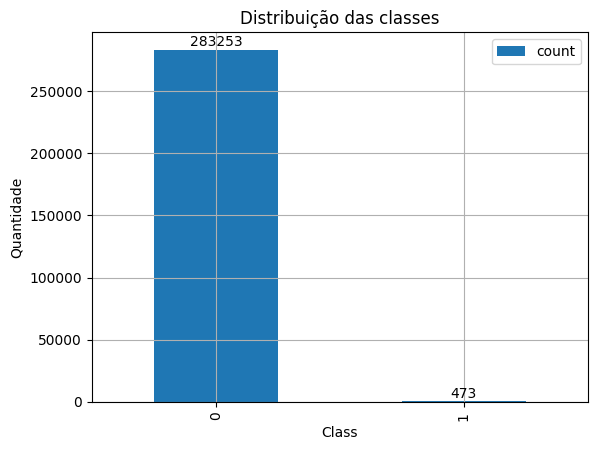

In [31]:
exibir_distribuicao_classes(newDataset)

#### Sem balanceamentos

In [32]:
X_train_original = X_train
y_train_original = y_train

#### Oversampling (SMOTE)

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Contagem após SMOTE: {y_train_smote.value_counts()}")

Contagem após SMOTE: Class
0    226602
1    226602
Name: count, dtype: int64


#### Undersampling (RandomUnderSampler)

In [36]:
from imblearn.under_sampling import RandomUnderSampler

nm = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = nm.fit_resample(X_train, y_train)

print(f"Contagem após Undersampling: {y_train_under.value_counts()}")

Contagem após Undersampling: Class
0    378
1    378
Name: count, dtype: int64


Combinação (Over/Under)

Obs: Usou-se a biblioteca SMOTEENN

In [35]:
from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
X_train_combine, y_train_combine = sme.fit_resample(X_train, y_train)

print(f"Contagem após Combinação (Over-Under): {y_train_combine.value_counts()}")

Contagem após Combinação (Over-Under): Class
1    226602
0    226270
Name: count, dtype: int64


#### Resumo dos Conjuntos de Treino

- X_train_original, y_train_original _>	Sem Balanceamento
- X_train_smote, y_train_smote ->	      Oversampling (SMOTE)
- X_train_under, y_train_under ->       Undersampling (NearMiss)
- X_train_combine, y_train_combine ->	  Combinação (SMOTEENN)

#### Exportação dos datasetes

In [44]:
import pickle
X_test_final = X_test
y_test_final = y_test

In [45]:
import pickle
import pandas as pd

import os
os.makedirs('datasets_tratados', exist_ok=True)
base_path = 'datasets_tratados'


treino_datasets = {
    'original': (X_train_original, y_train_original),
    'smote': (X_train_smote, y_train_smote),
    'under': (X_train_under, y_train_under),
    'combine': (X_train_combine, y_train_combine)
}

# ---  Salvamento dos Conjuntos de TREINO ---
print("--- Salvando Conjuntos de TREINO (.pkl) ---")
for name, (X_data, y_data) in treino_datasets.items():
    file_path = os.path.join(base_path, f'treino_{name}.pkl')
    
    # Salva X e y combinados (para flexibilidade de uso em Classificação ou Clusterização)
    with open(file_path, mode='wb') as f:
        pickle.dump([X_data, y_data], f)
    
    print(f"Salvo: {file_path}")

# ---Salvamento do Conjunto de TESTE (Único) ---
# O conjunto de teste é único e não balanceado.
teste_file_path = os.path.join(base_path, 'teste_final.pkl')

with open(teste_file_path, mode='wb') as f:
    pickle.dump([X_test_final, y_test_final], f)

print(f"\nSalvo: {teste_file_path}")
print("Todos os 5 conjuntos (4 treino, 1 teste) foram salvos com sucesso!")

--- Salvando Conjuntos de TREINO (.pkl) ---
Salvo: datasets_tratados\treino_original.pkl
Salvo: datasets_tratados\treino_smote.pkl
Salvo: datasets_tratados\treino_under.pkl
Salvo: datasets_tratados\treino_combine.pkl

Salvo: datasets_tratados\teste_final.pkl
Todos os 5 conjuntos (4 treino, 1 teste) foram salvos com sucesso!
